In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"../dataset/loan_data_set.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
dataset.shape

(614, 12)

In [91]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Individual null percentage
dataset.isnull().sum() / dataset.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [18]:
# Total null percentage
dataset.isnull().sum().sum() / (dataset.shape[0] * dataset.shape[1]) * 100

np.float64(1.8667000751691305)

In [90]:
dataset.notnull().sum()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

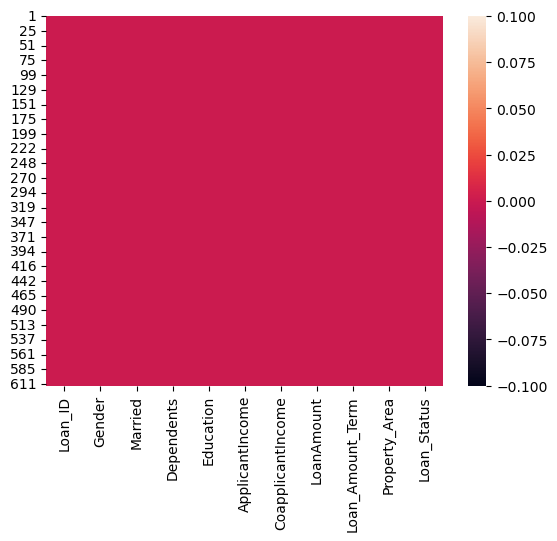

In [39]:
sns.heatmap(dataset.isnull())
plt.show()

In [34]:
##### Deleting a column - if it has >50% of null values
dataset.drop(columns=["Credit_History", "Self_Employed"], inplace=True)

In [38]:
##### Deleting a row with null values
dataset.dropna(inplace=True)

In [45]:
##### Imputing Data
### Categorical Data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [61]:
##### Back filling
### axis = 0 => fill data of next row data
dataset.fillna(method="bfill", axis=0)
dataset.bfill(axis=0)

### axis = 1 => fill data of next col data
dataset.fillna(method="bfill", axis=1)
dataset.bfill(axis=1)

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_11516\1132817096.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="bfill", axis=0)
C:\Users\Gaurang\AppData\Local\Temp\ipykernel_11516\1132817096.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="bfill", axis=1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,360.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [62]:
##### Front filling
### axis = 0 => fill data of previous row data
dataset.fillna(method="ffill", axis=0)
dataset.ffill(axis=0)

### axis = 1 => fill data of previous col data
dataset.fillna(method="ffill", axis=1)
dataset.ffill(axis=1)

C:\Users\Gaurang\AppData\Local\Temp\ipykernel_11516\1431720527.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="ffill", axis=0)
C:\Users\Gaurang\AppData\Local\Temp\ipykernel_11516\1431720527.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="ffill", axis=1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [69]:
##### Filling categorical data using mode value
# dataset["Gender"].fillna(dataset["Gender"].mode()[0], inplace=True)
dataset.fillna({"Gender": dataset["Gender"].mode()[0]}, inplace=True)

In [66]:
dataset["Gender"].mode()[0]

'Male'

In [89]:
dataset.select_dtypes(include=["object"]).isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [88]:
dataset.fillna({"Gender": dataset["Gender"].mode()[0],
                "Married": dataset["Married"].mode()[0],
                "Dependents": dataset["Dependents"].mode()[0],
                "Self_Employed": dataset["Self_Employed"].mode()[0]}, inplace=True)

In [96]:
##### Imputing Data
### Numerical Data
from sklearn.impute import SimpleImputer

In [100]:
dataset.select_dtypes(include=["float64", "int64"]).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [108]:
si = SimpleImputer(strategy="mean")
ar = si.fit_transform(dataset[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])

array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

In [110]:
pd.DataFrame(ar, columns=dataset.select_dtypes(include=["float64", "int64"]).columns)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,146.412162,360.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0
2,3000.0,0.0,66.000000,360.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.000000,360.0,1.0
610,4106.0,0.0,40.000000,180.0,1.0
611,8072.0,240.0,253.000000,360.0,1.0
612,7583.0,0.0,187.000000,360.0,1.0
